In [1]:
#################################################################
#                                                               #  
#   Philip Alan Bramwell                                        #
#   933012                                                      #
#   Lernen mit Belohnung                                        #
#                                                               #
#################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class coords_info:
    # Diese Klasse dient dazu, alle Koordinaten (Start, Ende, Hindernisse, Größe der Matrix/Feld) 
    # kompakt an Funktionen/Methoden übergeben zu können. setter werden nicht verwendet, jedoch die getter
    
    def __init__(self, m, n, start_point, end_point, obstacles=[]):
        self.start_point = start_point
        self.end_point = end_point
        self.obstacles = obstacles
        self.m = m
        self.n = n
    
    
    def set_start_point(self, start_point):
        self.start_point = start_point
        
        
    def set_end_point(self, end_point):
        self.end_point = end_point
        
        
    def set_obstacles(self, obstacles):
        self.obstacles = obstacles
    
    
    def set_m(self, m):
        self.m = m
    
    
    def set_n(self, n):
        self.n = n
        
    
    def get_start_point(self):
        return self.start_point
    
    
    def get_end_point(self):
        return self.end_point

    
    def get_obstacles(self):
        return self.obstacles
    
    
    def get_m(self):
        return self.m
    
    
    def get_n(self):
        return self.n

In [3]:
def create_untrained_df(coords):
    # Erstellt ein pandas DataFrame aus den Information der übergebenen coords_info Klasse
    
    m = coords.get_m()
    n = coords.get_n()
    matrix = np.zeros((m, n))
    
    # Startpunkt der/dem Matrix/DataFrame auf 1 setzen
    start_point = coords.get_start_point()
    matrix[start_point[0], start_point[1]] = 1
    
    # Endpunkt in der/dem Matrix/DataFrame auf 2 setzen
    end_point = coords.get_end_point()
    matrix[end_point[0], end_point[1]] = 2
    
    # Hindernisse in der/dem Matrix/DataFrame auf 3 setzen
    obstacles = coords.get_obstacles()
    if obstacles != None:
        for obstacle in obstacles:
            matrix[obstacle[0], obstacle[1]] = 3
    
    df = pd.DataFrame(matrix)
    
    return df


def create_untrained_figure(df, coords):
    # Erstellt matplotlib subplots mit table und einer seaborn heatmap aus den Informationen des übergebenen pandas DataFrames,
    # welches den untrainierten Zustand darstellt
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    start_point = coords.get_start_point()
    end_point = coords.get_end_point()
    obstacles = coords.get_obstacles()

    ax[0].axis('off')
    ax[0].set_title('table')
    
    # matplotlib table aus dem untrainierten Zustand erstellen und die Zellen für Startpunkt, Endpunkt und Hindernisse farblich hervorheben
    colour_df = df.apply(lambda col: ['#9f00ff66' if x == 1 else '#ff006466' if x == 2 else '#ffff0066' if x == 3 else '#c8c8c8d9' for x in col])
    table = ax[0].table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellColours=colour_df.to_numpy())

    # seaborn heatmap aus dem untrainierten Zustand erstellen
    ax[1].set_title('heatmap')
    sns.heatmap(df, annot=True, cmap='plasma', ax=ax[1], linewidths=1, linecolor='k')

    # Title sowie Zusatzinformation (Position Startpunk, Endpunkt, Hindernisse) anzeigen
    fig.suptitle(f'startpoint, endpoint and obstacle info', fontsize=20)
    fig.text(0, 0, f'1.0 = startpoint at {start_point[0], start_point[1]}\n2.0 = endpoint at {end_point[0], end_point[1]}\n'
             f'3.0 = obsticle at {[obstacle for obstacle in obstacles]}')
    #fig.tight_layout()
    
    plt.show()
    print()


def create_explore_figure(df, steps_list):
    # Erstellt matplotlib subplots mit table und einer seaborn heatmap aus den Informationen des übergebenen pandas DataFrames,
    # welches den explore Zustand darstellt
    
    # DataFrame aus den einzelnen Schritten, welche beim exploren gegangen wurden aus der übergebenen steps_list erstellen (maximal 20 Schritte)
    steps_df = pd.DataFrame({'step': np.arange(np.min((len(steps_list), 20))), 'm-Pos': [step[0] for step in steps_list[:np.min((len(steps_list), 20))]], 
                                   'n-Pos': [step[1] for step in steps_list[:np.min((len(steps_list), 20))]]})
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    ax[0].axis('off')
    ax[0].set_title('first 20 steps')

    # Falls mindestens ein Schritt beim exploren gegangen wurde, wird ein matplotlib table mit den gegangen Schritten erstellt und die Zellen eingegraut
    if not len(steps_list) == 0:
        colour_df = steps_df.apply(lambda col: ['#c8c8c8d9' for x in col])
        table = ax[0].table(cellText=steps_df.values, colLabels=steps_df.columns, loc='center', cellColours=colour_df.to_numpy())
    
    # seaborn heatmap aus dem explore Zustand erstellen
    ax[1].set_title('heatmap')
    sns.heatmap(df, cmap='plasma', ax=ax[1], linewidths=1, linecolor='k', annot=True, fmt='.0f')

    # Title sowie Zusatzinformation (maximal die ersten 20 Schritte, die beim exploren gegangen wurden) anzeigen
    fig.suptitle(f'explore steps', fontsize=20)
    fig.text(0, 0, f'total steps: {len(steps_list)}')
    #fig.tight_layout()
    
    plt.show()
    print()
    
    
def create_movement_values_figure(df, coords, iters):
    # Erstellt matplotlib subplots mit table und einer seaborn heatmap aus den Informationen des übergebenen pandas DataFrames,
    # welches den Punktevergabe Zustand darstellt
    
    start_point = coords.get_start_point()
    end_point = coords.get_end_point()
    obstacles = coords.get_obstacles()
    
    # übergebenes DataFrame kopieren und die float Genauigkeit der Werte für die Punktevergabe auf 3 stellen nach dem Komma setzen, 
    # da sonst die Zahlen zu lang werden und nicht mehr übersichtlich in der seaborn heatmap dargestellt werden können
    float_precison_df = pd.DataFrame.copy(df).apply(lambda col: [np.round(x, 3) for x in col])
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    ax[0].axis('off')
    ax[0].set_title('table')

    # matplotlib table aus dem Punktevergabe Zustand erstellen und die Zellen für Startpunkt, Endpunkt und Hindernisse farblich hervorheben
    colour_df = df.apply(lambda col: ['#ff006466' if x == 1 else '#ffff0066' if x == -1 else '#c8c8c8d9' for x in col])
    colour_df.loc[start_point[0], start_point[1]] = '#9f00ff66'
    table = ax[0].table(cellText=float_precison_df.values, colLabels=float_precison_df.columns, rowLabels=float_precison_df.index, loc='center', cellColours=colour_df.to_numpy())

    # seaborn heatmap aus dem Punktevergabe Zustand erstellen
    ax[1].set_title('heatmap')
    sns.heatmap(float_precison_df, cmap='plasma', ax=ax[1], linewidths=1, linecolor='k', annot=True)

    # Title sowie Zusatzinformation (Position Startpunk, Endpunkt, Hindernisse, Iterationsanzahl) anzeigen
    fig.suptitle(f'movement values', fontsize=20)
    fig.text(0, 0, f'startpoint at {start_point[0], start_point[1]}'
             f'\nendpoint at {end_point[0], end_point[1]}'
             f'\nobsticle at {[obstacle for obstacle in obstacles]}'
             f'\niterations: {iters}')
    
    #fig.tight_layout()
    
    plt.show()
    print()
    
    
def create_exploit_figure(df, exploit_list, coords, optimal_distance, successfully_found_way):
    # Erstellt matplotlib subplots mit table und einer seaborn heatmap aus den Informationen des übergebenen pandas DataFrames,
    # welches den exploit Zustand darstellt
    
    start_point = coords.get_start_point()
    
    # Übergebenes DataFrame kopieren und Startpunkt des kopierten DataFrames auf -1 setzen, um somit den Startpunkt in der heatmap sehen zu können
    start_point_included_df = pd.DataFrame.copy(df)
    start_point_included_df.loc[start_point[0], start_point[1]] = -1
    
    # DataFrame aus den einzelnen Schritten, welche beim exploiten gegangen wurden, aus der übergebenen exploit_list erstellen (maximal 20 Schritte)
    exploit_df = pd.DataFrame({'step': np.arange(np.min((len(exploit_list), 20))),
                               'm-Pos': [step[0] for step in exploit_list[:np.min((len(exploit_list), 20))]],
                               'n-Pos': [step[1] for step in exploit_list[:np.min((len(exploit_list), 20))]]})
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    ax[0].axis('off')
    ax[0].set_title('first 20 exploit values')

    # Falls mindestens ein Schritt beim exploiten gegangen wurde, wird ein matplotlib table mit den gegangen Schritten erstellt und die Zellen eingegraut
    if not len(exploit_list) == 0:
        colour_df = exploit_df.apply(lambda col: ['#c8c8c8d9' for x in col])
        table = ax[0].table(cellText=exploit_df.values, colLabels=exploit_df.columns, loc='center', cellColours=colour_df.to_numpy())

    # seaborn heatmap aus dem exploit Zustand erstellen 
    ax[1].set_title('heatmap')
    sns.heatmap(start_point_included_df, cmap='plasma', ax=ax[1], linewidths=1, linecolor='k', annot=True, fmt='.0f')

    # Title sowie Zusatzinformation (maximal die ersten 20 Schritte, die beim exploiten gegangen wurden) anzeigen
    fig.suptitle(f'exploit steps', fontsize=20)
    fig.text(0, 0, f'successfully found the way to the endpoint: {successfully_found_way}'
             f'\ntotal exploit steps: {len(exploit_list) - 1}'
             f'\noptimal exploit steps: {optimal_distance}')
    
    #fig.tight_layout()
    
    plt.show()
    print()

In [4]:
class train:
    
    def create_explore_df(self, df, coords):
        # Aus dem übergebenen DataFrame, welches den untrainierten Zustand darstellt, wird in den explore Zustand übergegangen, indem solange zufällig Schritte 
        # gegangen werden, bis der Endpunkt gefunden wurde
        
        steps_list = []
        m = coords.get_m()
        n = coords.get_n()
        
        current_point = coords.get_start_point()
        end_point = coords.get_end_point()
        
        # Falls der Startpunkt gleich dem Endpunkt ist, ist ein zufälliges Suchen des Enpunktes nicht mehr nötig und das übergebene DataFrame 
        # sowie die lehre Liste mit den gegangenen Schritten wird zurückgegeben
        if current_point == end_point:
            return df, steps_list
        
        steps_list.append(current_point)
        
        # Es wird solange nach neuen Schritten gesucht, bis der Endpunkt gefunden wurde
        while True:
            # Es wird zufällig bestimmt, ob nach oben/unten oder links/rechts gegangen werden soll
            move_up_down_or_left_right = np.random.randint(0, 2)
            
            if move_up_down_or_left_right == 0:
                # Es wird überprüft, ob ein Schritt nach oben bzw. unten zulässig ist und es wird dann ein Schritt nach oben bzw. unten gegangen
                move_up_down = self.__get_move_up_down(current_point, m)
                current_point = (current_point[0] + move_up_down, current_point[1])
            else:
                # Es wird überprüft, ob ein Schritt nach links bzw. rechts zulässig ist und es wird dann ein Schritt nach links bzw. rechts gegangen
                move_left_right = self.__get_move_left_right(current_point, n)
                current_point = (current_point[0], current_point[1] + move_left_right)
            
            steps_list.append(current_point)
            
            if current_point == end_point:
                break
        
        # DataFrame aus den einzelnen Explore-Schritten erstellen
        df = self.__create_steps_df(steps_list, m, n)
        
        return df, steps_list
    
    
    def create_movement_values_df(self, steps_list, coords, gamma=0.9, previous_df=pd.DataFrame()):
        # Aus der übergebenen Liste, welches die einzelnen Schritte beim exploren beinhaltet, wird ein Punktevergabe Zustand berechnet, indem vom Ende der List aus
        # (Endpunkt/Ziel) in absteigender Reihenfolge ein Wert, welcher von dem Hyperparameter gamma abhängt, vergeben wird
        
        obstacles = coords.get_obstacles()
        
        # Liste der gegangen Schritte beim exploren wird invertiert, da die Punkte vom Endpunkt aus vergeben werden
        reverse_steps_list = np.array(steps_list)[::-1]
        
        # Falls nur eine Iteration erfolgen soll, ist das previous_df DataFrame lehr und muss erst erstellt werden
        # Falls mehrere Iterationen durchgeführt werden sollen wird das übergebene previous_df DataFrame verwendet und mit jeder Iteration weiter mit Punkten befüllt
        if previous_df.empty:
            m = coords.get_m()
            n = coords.get_n()
            
            matrix = np.zeros((m, n))
            previous_df = pd.DataFrame(matrix)
        
        for i, step in enumerate(reverse_steps_list):
            # Positionen an denen sich ein Hindernis befinden, erhalten einen negativen Punktwert
            if tuple(step) in obstacles:
                previous_df.loc[step[0], step[1]] = -1
            else:
                # Positionen welche keinen negativen Punktewert und einen kleineren Punktewert als der neue Punktewert besitzen, erhalten einen neuen Punktewert
                if previous_df.loc[step[0], step[1]] < gamma ** i and previous_df.loc[step[0], step[1]] != -1:
                    previous_df.loc[step[0], step[1]] = gamma ** i
            
        return previous_df

    
    def create_exploit_df(self, movement_values_df, coords, correction_tolerance, explore_exploit_ratio):
        # Aus dem übergebenen DataFrame, welches den Punktevergabe Zustand darstellt, wird in den exploit Zustand übergegangen, indem zufällig oder anhand der Punktevergabe
        # oder beidem ein Weg zu dem Endpunkt gesucht wird
        
        i = 1
        m = coords.get_m()
        n = coords.get_n()
        
        successfully_found_way = True
        
        current_point = coords.get_start_point()
        end_point = coords.get_end_point()
        
        matrix = np.zeros((m, n))
        highest_values_df = pd.DataFrame(matrix)
        highest_values_list = []
        
        highest_values_list.append((current_point[0], current_point[1]))
        
        # Falls der Startpunkt gleich dem Endpunkt ist, wurden keine Schritte beim exploren gegangen und somit gab es auch keine Punktevergabe, weshalb das 
        # übergebene DataFrame sowie die lehre Liste mit den gegangenen Schritten zurückgegeben wird
        if current_point == end_point:
            return highest_values_df, highest_values_list
        
        # Es wird solange nach neuen Schritten gesucht, bis der Endpunkt gefunden wurde, oder keine Schritte mehr gegangen werden können oder keine Schritte
        # mehr zulässig sind
        while True:
            # Es wird ermittelt, welche Schritte zulässig sind
            movement_options = self.__get_movement_options(current_point, highest_values_list, correction_tolerance, m, n)
            
            # Falls kein Schritt mehr zulässig ist, wird abgebrochen (Enpunkt/Ziel konnte nicht erreicht werden)
            if movement_options == (-10, -10):
                successfully_found_way = False
                break
            
            # Es wird ermittelt, welcher Schritt letztendlich gegangen wird
            current_point = self.__get_movement_value_coords(movement_values_df, movement_options, explore_exploit_ratio)
            
            # Falls kein Schritt mehr gegangen werden kann, wird abgebrochen (Enpunkt/Ziel konnte nicht erreicht werden)
            if current_point == (-10, -10):
                successfully_found_way = False
                break
            
            # der neue Schritt wird einer Liste, sowie einem DataFrame hinzugefügt
            highest_values_list.append(current_point)
            highest_values_df.loc[current_point[0], current_point[1]] = i
            i = i + 1
            
            if current_point == end_point:
                break
                
        return highest_values_df, highest_values_list, successfully_found_way
                
        
    def __get_movement_options(self, current_point, highest_values_list, correction_tolerance, m, n):
        # Ermittelt ob ein Gehen nach oben/unten/links/rechts zulässig ist und vermerkt diese Schritte als mögliche zu gehenden Schritte
        
        movement_options = []
        movement_options_to_be_removed = []
        
        # Fügt einen zulässigen Schritt als Schrittoption in einer Liste hinzu
        if not current_point[0] == 0:
            movement_options.append((current_point[0] - 1, current_point[1]))
        if not current_point[0] == m - 1:
            movement_options.append((current_point[0] + 1, current_point[1]))
        if not current_point[1] == 0:
            movement_options.append((current_point[0], current_point[1] - 1))
        if not current_point[1] == n - 1:
            movement_options.append((current_point[0], current_point[1] + 1))
            
        # Der correction_tolerance parameter bestimmt, wie oft ein Feld wiederholt betreten werden darf 
        # (correction_tolerance=0 -> 1 mal auf das gleiche Feld (kein zweites mal Betreten erlaubt) 
        # / correction_tolerance=1 -> 2 mal auf das gleiche Feld (kein drittes mal Betreten erlaubt/ usw.)
        # Falls in der Liste mit Schrittoptionen Schritte auftauchen, die wegen dem correction_tolerance parameter verboten sind,
        # werden sie aus der Liste mit Schrittoptionen entfernt
        for movement_option in movement_options:
            # Zählt wie oft ein Schritt aus den Schrittoptionen bereits bereten wurde
            occurrences = highest_values_list.count(movement_option)
            
            # Überprüft ob ein Schritt abhängig von dem correction_tolerance parameter erlaubt ist und vermerkt ein Verbot in einer Liste
            if occurrences > correction_tolerance:
                movement_options_to_be_removed.append(movement_option)
                
        # Entfernt alle Schritte die auf Grund des correction_tolerance parameters verboten sind
        movement_options = [movement_option for movement_option in movement_options if movement_option not in movement_options_to_be_removed]
            
        # Ein ungültiger Schritt wird zurückgegeben, falls kein Schritt mehr zulässig ist
        if len(movement_options) <= 0:
            return (-10, -10)
        
        return movement_options
    
    
    def __get_movement_value_coords(self, movement_values_df, movement_options, explore_exploit_ratio):
        # Ermittelt welcher Schritt gegangen werden soll
        
        movement_values = []
        movement_values_coords = 0
        
        # Fügt alle Punktewerte, von den Schritten die zulässig sind, einer Liste hinzu 
        for movement_option in movement_options:
            movement_values.append(movement_values_df.loc[movement_option[0], movement_option[1]])
            
        # Ein ungültiger Schritt wird zurückgegeben, falls kein Schritt mehr gegangen werden kann (Alle möglichen Schritte führen zu einem Hindernis)
        if all(movement_value == -1 for movement_value in movement_values):
            return (-10, -10)
        
        # explore_exploit_ratio parameter bestimmt, mit welcher Wahrscheinlichkeit ein Schritt explored (Zufall) oder exploited (Punktevergabe) werden soll
        # explore_exploit_ratio kann float Werte zwischen 0 und 1 annehmen, wobei dieser Wert die Wahrscheinlichkeit für einen exploited Schritt angibt 
        # (0 -> 0% exploit und 100% explore / 1 -> 100% exploit und 0% explore / Werte zwischen 0 und 1 möglich)
        if np.random.randint(100) + 1 <= explore_exploit_ratio * 100:
            # Ermittelt die Indices der höchsten Punktewerte aus der Liste mit den Punktewerten
            highest_values_indices = np.argwhere(movement_values == np.amax(movement_values)).flatten()

            # Ermittelt einen zufälligen Index aus der Liste mit den höchsten Punktewerten
            random_highest_value_index = highest_values_indices[np.random.randint(0, len(highest_values_indices))]

            # Ermittelt den letztendlich zu gehenden Schritt, abhängig von dem Index des höchsten und ausgewählten Punktewertes
            movement_values_coords = movement_options[random_highest_value_index]
        else:
            # Ermittelt zufällig den letztendlich zu gehenden Schritt (explore)
            while True:
                rand_index = np.random.randint(0, len(movement_options))
                movement_values_coords = movement_options[rand_index]
                
                # Falls der Wert des Feldes, auf das gegangen werden soll, ein Hindernis ist (-1 als Punktewert) soll solange zufällig ein anderes Feld 
                # gesucht werden, bis ein Feld gefunden wurde, welches nicht einen Wert von -1 hat (Eine Endlosschleife ist hier ausgeschlossen, da am Anfang der
                # Funktion bereits abefragt (und wenn nötig returned) wird, wenn alle Felder, auf die gegangen werden könnte, ein Hindernis aufweisen)
                if movement_values[rand_index] != -1:
                    break
        
        return movement_values_coords
    
    
    def __get_move_up_down(self, current_point, m):
        # Überprüft, ob ein Schritt nach oben bzw. unten zulässig ist, falls ein Schritt nach oben und unten zulässig ist,
        # wird zufällig entschieden, ob nach oben oder unten gegangen werden soll
        
        if current_point[0] <= 0:
            move_up_down = 1
        elif current_point[0] >= m - 1:
            move_up_down = -1
        else:
            move_up_down = 1 if np.random.rand() < 0.5 else -1
        
        return move_up_down
    
        
    def __get_move_left_right(self, current_point, n):
        # Überprüft, ob ein Schritt nach links bzw. rechts zulässig ist, falls ein Schritt nach links und rechts zulässig ist,
        # wird zufällig entschieden, ob nach links oder rechts gegangen werden soll
        
        if current_point[1] <= 0:
            move_left_right = 1
        elif current_point[1] >= n - 1:
            move_left_right = -1
        else:
            move_left_right = 1 if np.random.rand() < 0.5 else -1
            
        return move_left_right
    
    
    def __create_steps_df(self, steps_list, m, n):
        # Erstellt ein DataFrame aus den Schritten, die beim exporen gegangen wurden
        
        matrix = np.zeros((m, n))
        steps_df = pd.DataFrame(matrix)
        for i, step in enumerate(steps_list):
            # Es werden aufsteigende Zahlen an den Koordinationspunkten, die beim exporen gegangen wurden, in das DataFrame eingefügt
            steps_df.loc[step[0], step[1]] = i + 1
            
        return steps_df

In [5]:
def rewarded_learning_train(coords, iter_num=1, gamma=0.9, correction_tolerance=1, explore_exploit_ratio=1):
    iters = 1
    start_point = coords.get_start_point()
    end_point = coords.get_end_point()
    manhattan_distance = np.abs(end_point[0] - start_point[0]) + np.abs(end_point[1] - start_point[1])
    
    tr = train()

    # untrained DataFrame erstellen und dieses Visualisieren
    untrained_df = create_untrained_df(coords)
    create_untrained_figure(untrained_df, coords)

    explore_df, explore_steps_list = tr.create_explore_df(untrained_df, coords)
    
    # Die explore Schritte sollen nur visualisiert werden, wenn eine Iteration durchgeführt wird (Bei 100 Iteration würden die explore Schritte sonst 100 mal visualisiert werden)
    if iter_num == 1:
        create_explore_figure(explore_df, explore_steps_list)
        
    movement_values_df = tr.create_movement_values_df(explore_steps_list, coords, gamma=gamma)

    while iters < iter_num:
        explore_df, explore_steps_list = tr.create_explore_df(untrained_df, coords)
        # movement_values_df wird hier als previous_df DataFrame übergeben, wodurch die Punktewerte iterativ angepasst werden
        movement_values_df = tr.create_movement_values_df(explore_steps_list, coords, gamma=gamma, previous_df=movement_values_df)
            
        iters = iters + 1

    # Punktevergabe Visualisieren, sowie exploit DataFrame erstellen und mit Zusatzinformation Visualisieren
    create_movement_values_figure(movement_values_df, coords, iters)
    exploit_df, exploit_steps_list, successfully_found_way = tr.create_exploit_df(movement_values_df, coords, correction_tolerance=correction_tolerance, 
                                                                                  explore_exploit_ratio=explore_exploit_ratio)
    create_exploit_figure(exploit_df, exploit_steps_list, coords, manhattan_distance, successfully_found_way)

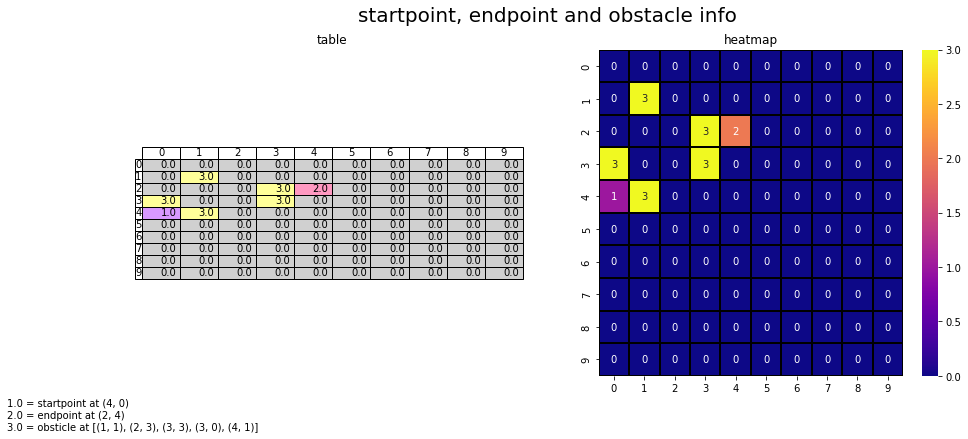

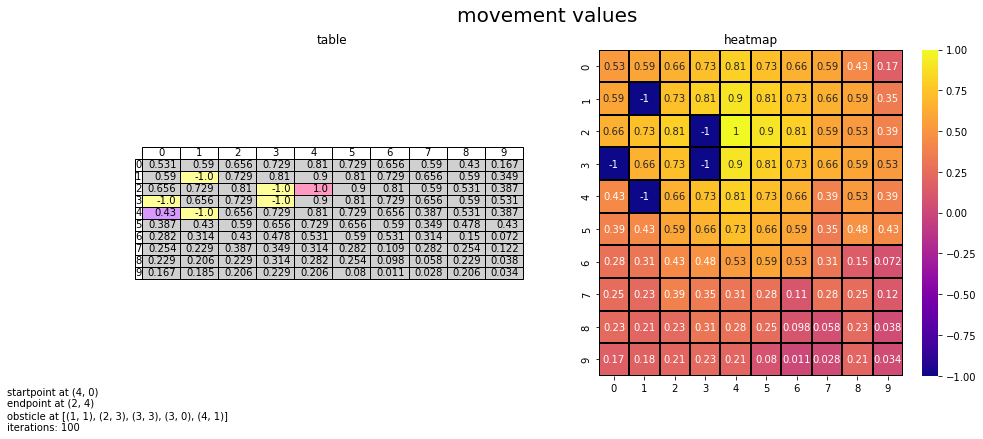

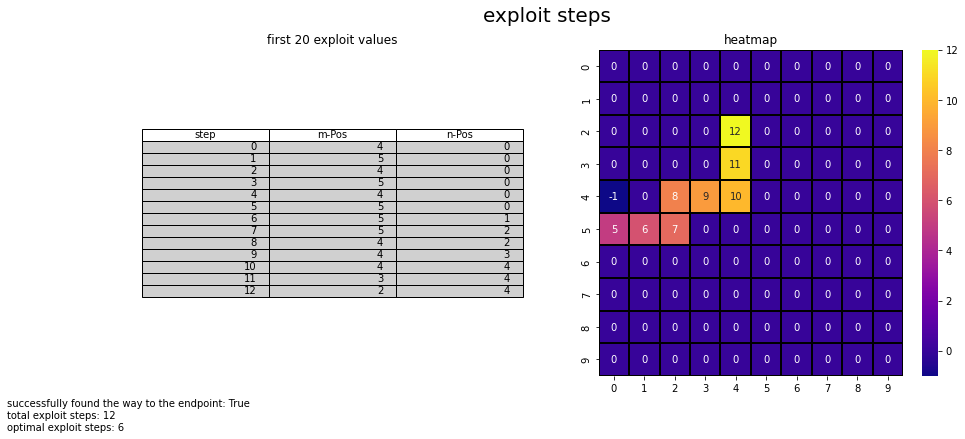

In [6]:
# Parameter für die coords_info Klasse:
# erster Parameter bestimmt die Reihenanzahl (m) der Matrix
# zweiter Parameter bestimmt die Spaltenanzahl (n) der Matrix
# dritter Parameter bestimmt die Position des Startpunktes (m, n) -> Tuple 
# vierter Parameter bestimmt die Position des Endpunkt (m, n)     -> Tuple
# fünfter Parameter bestimmt die Position der Hindernisse (m, n)  -> Liste/Tuple von Tuple


# Parameter für die rewarded_learning_train Funktion:
# erster Parameter bestimmt die Koordinaten, die als Informationen für das Lernen benötigt werden (coords_info Klasse)
# zweiter Parameter bestimmt wie oft Explored und anschließend die Punkte vergeben werden sollten (Durchgänge des Lernens)
# dritter Parameter bestimmt wie oft ein Feld wiederholt betreten werden darf (0 -> nur einmal betreten erlaubt, 1 -> zwei mal betreten erlaubt, usw.)

# vierter Parameter bestimmt welcher Wert bei der Punktevergabe verwendet werden soll 
# Bei Werten unter 1 -> vom Endpunkt aus absteigende Punktewerte; 
# Bei Werten über 1 -> vom Endpunkt aus aufsteigende Punktewerte (Verhalten nicht erwünscht); 
# Bei Wert gleich 1 -> konstante Punktewerte (Verhalten nicht erwünscht)

# fünfter Parameter bestimmt mit welchem Verhältniss in der Exploid Phase der Weg gesucht werden soll 
# (0 -> 0% exploit und 100% explore / 1 -> 100% exploit und 0% explore / Werte zwischen 0 und 1 möglich)


# 1. Einleitung
#coords = coords_info(3, 3, (2, 0), (2, 2), [(0, 0), (1, 2)])
#rewarded_learning_train(coords, iter_num=1, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)


# 2. Kritsche Betrachtung der Parameter

# 2.1 Verschiedene Anzahl von Lerndurchläufen
#coords = coords_info(8, 8, (3, 1), (5, 6))

# Lerndurchlauf: 1
#rewarded_learning_train(coords, iter_num=1, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)

# Lerndurchlauf: 10
#rewarded_learning_train(coords, iter_num=10, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)

# Lerndurchlauf: 100
#rewarded_learning_train(coords, iter_num=100, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)


# 2.2 Verschiedene Start- und Endpunkte

# Startpunkt (7, 0), (0, 7)
#coords = coords_info(8, 8, (7, 0), (0, 7))
#rewarded_learning_train(coords, iter_num=1, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)

# Startpunkt (7, 0), (7, 7)
#coords = coords_info(8, 8, (7, 0), (7, 7))
#rewarded_learning_train(coords, iter_num=1, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)

# Startpunkt (3, 0) (3, 7)
#coords = coords_info(8, 8, (3, 0), (3, 7))
#rewarded_learning_train(coords, iter_num=1, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)

# Startpunkt (2, 1), (2, 4)
#coords = coords_info(8, 8, (2, 1), (2, 4))
#rewarded_learning_train(coords, iter_num=1, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)

# Startpunkt (2, 1), (4, 4)
#coords = coords_info(8, 8, (2, 1), (4, 4))
#rewarded_learning_train(coords, iter_num=1, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)

# Startpunkt (4, 1), (2, 6)
#coords = coords_info(8, 8, (4, 1), (2, 6))
#rewarded_learning_train(coords, iter_num=1, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)


# 2.3 Verschiedene Gamma Werte
#coords = coords_info(8, 8, (3, 1), (5, 6))

# Gamma Wert von 0.9
#rewarded_learning_train(coords, iter_num=30, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)

# Gamma Wert von 0.5
#rewarded_learning_train(coords, iter_num=30, correction_tolerance=3, gamma=0.5, explore_exploit_ratio=1)

# Gamma Wert von 0.1
#rewarded_learning_train(coords, iter_num=30, correction_tolerance=3, gamma=0.1, explore_exploit_ratio=1)

# Gamma Wert von 1e-3
#rewarded_learning_train(coords, iter_num=30, correction_tolerance=3, gamma=1e-3, explore_exploit_ratio=1)

# Gamma Wert von 1e-10
#rewarded_learning_train(coords, iter_num=30, correction_tolerance=3, gamma=1e-10, explore_exploit_ratio=1)

# Gamma Wert von 1e-20
#rewarded_learning_train(coords, iter_num=30, correction_tolerance=3, gamma=1e-20, explore_exploit_ratio=1)


# 2.4 Hindernisse und verschiedenen Explore Exploit Werten
coords = coords_info(10, 10, (4, 0), (2, 4), [(1, 1), (2, 3), (3, 3), (3, 0), (4, 1)])

# Hindernisse mit explore_exploit_ratio von 1
rewarded_learning_train(coords, iter_num=100, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=1)

# Hindernisse mit explore_exploit_ratio von 0.5
#rewarded_learning_train(coords, iter_num=100, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=0.5)

# Hindernisse mit explore_exploit_ratio von 0.2
#rewarded_learning_train(coords, iter_num=100, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=0.2)

# Hindernisse mit explore_exploit_ratio von 0.1
#rewarded_learning_train(coords, iter_num=100, correction_tolerance=3, gamma=0.9, explore_exploit_ratio=0.1)

# Hindernisse mit explore_exploit_ratio von 0.5 und correction tolerance von 0
#rewarded_learning_train(coords, iter_num=100, correction_tolerance=0, gamma=0.9, explore_exploit_ratio=0.5)

# Hindernisse mit explore_exploit_ratio von 0.1 und correction tolerance von 0
#rewarded_learning_train(coords, iter_num=100, correction_tolerance=0, gamma=0.9, explore_exploit_ratio=0.1)